In [1]:
import sys
sys.path.append("..")
import json
import numpy as np
import random
import os
import time
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from pandas.core.frame import DataFrame

In [2]:
# file_folder_orgin = os.path.abspath(os.path.join(os.getcwd(), "..")) + "/2020_12_01_NSGA_II_results_10000"
file_folder_orgin = os.path.abspath(os.path.join(os.getcwd(), "..")) + "/2020_12_24_Random_results_20000"

sum_list_orgin = []
result_list = []
fileList = os.listdir(file_folder_orgin)
fileList.sort()
for i in range(len(fileList)):
    textname = file_folder_orgin + '/' + fileList[i]
    # print(textname)
    result = np.loadtxt(textname)
    sum = 0
    # flag = 0
    # for j in range(len(result)):
    # 	if not (result[j] >=0 and result[j] <= 1):
    #         flag = 1
    # 		break
    # if not flag:
    result_new = [result[0],result[1],result[2],result[3],result[5]]
    result_list.append(list(result))
    for j in range(len(result)):
        if result[j] == 1:
            sum += result[j] * np.power(2, j)
    sum_list_orgin.append(sum)

In [21]:
sns.set_style("darkgrid")
data_result = DataFrame(result_list)
data_result.rename(columns={0:'a',1:'b',2:'c',3:'d',4:'e',5:'f',6:'g'},inplace=True)#注意这里0和1都不是字符串
data_result.dropna(axis=0,how='any')

,a,b,c,d,e,f,g
0,1.0,3.508991,1.0,1.0,1.0,0.987276,0.998752
1,1.0,3.519003,1.0,1.0,1.0,0.989341,0.999004
2,1.0,4.031208,1.0,1.0,1.0,1.000000,0.998966
3,0.0,3.584131,1.0,1.0,1.0,0.975989,0.995842
4,1.0,3.531789,1.0,1.0,1.0,0.980824,0.999133
...,...,...,...,...,...,...,...
19995,1.0,7.087237,1.0,1.0,1.0,1.000000,0.999527
19996,1.0,4.033405,1.0,1.0,1.0,1.000000,0.999578
19997,1.0,4.002332,1.0,1.0,1.0,1.000000,0.998938
19998,1.0,7.524684,1.0,1.0,1.0,1.000000,0.998993


/Users/luoyixing/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='a'>

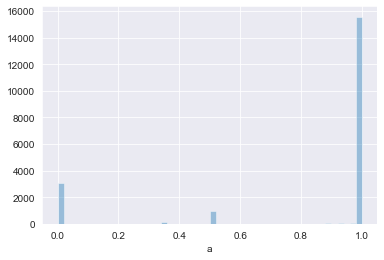

In [23]:
sns.distplot(data_result['a'],kde = False)

<AxesSubplot:xlabel='b'>

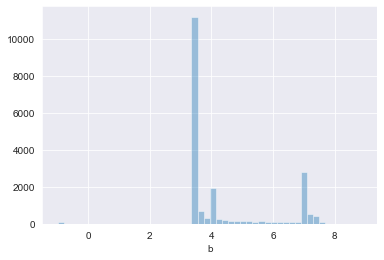

In [24]:
sns.distplot(data_result['b'],kde = False)

<AxesSubplot:xlabel='c'>

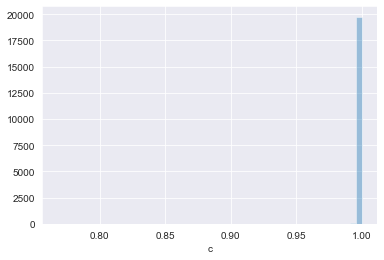

In [25]:
sns.distplot(data_result['c'],kde = False)

<AxesSubplot:xlabel='d'>

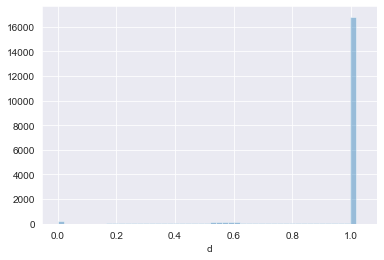

In [26]:
sns.distplot(data_result['d'],kde = False)

<AxesSubplot:xlabel='e'>

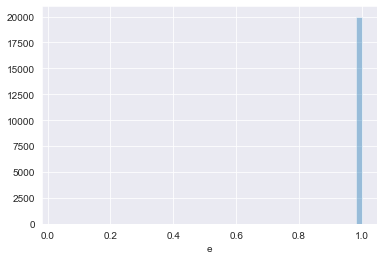

In [27]:
sns.distplot(data_result['e'],kde = False)

<AxesSubplot:xlabel='f'>

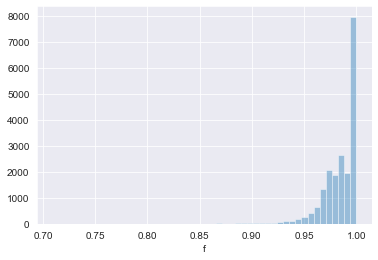

In [28]:
sns.distplot(data_result['f'],kde = False)

<AxesSubplot:xlabel='g'>

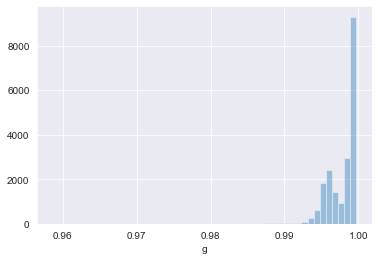

In [29]:
sns.distplot(data_result['g'],kde = False)

          a         b         c         d         e         f         g
a  1.000000  0.283365 -0.040555  0.539667  0.026456  0.378597  0.649120
b  0.283365  1.000000  0.005616  0.196357  0.008104  0.182518  0.202526
c -0.040555  0.005616  1.000000 -0.030335 -0.001843  0.200790  0.248995
d  0.539667  0.196357 -0.030335  1.000000 -0.008520  0.294998  0.473524
e  0.026456  0.008104 -0.001843 -0.008520  1.000000  0.110408  0.116916
f  0.378597  0.182518  0.200790  0.294998  0.110408  1.000000  0.789182
g  0.649120  0.202526  0.248995  0.473524  0.116916  0.789182  1.000000


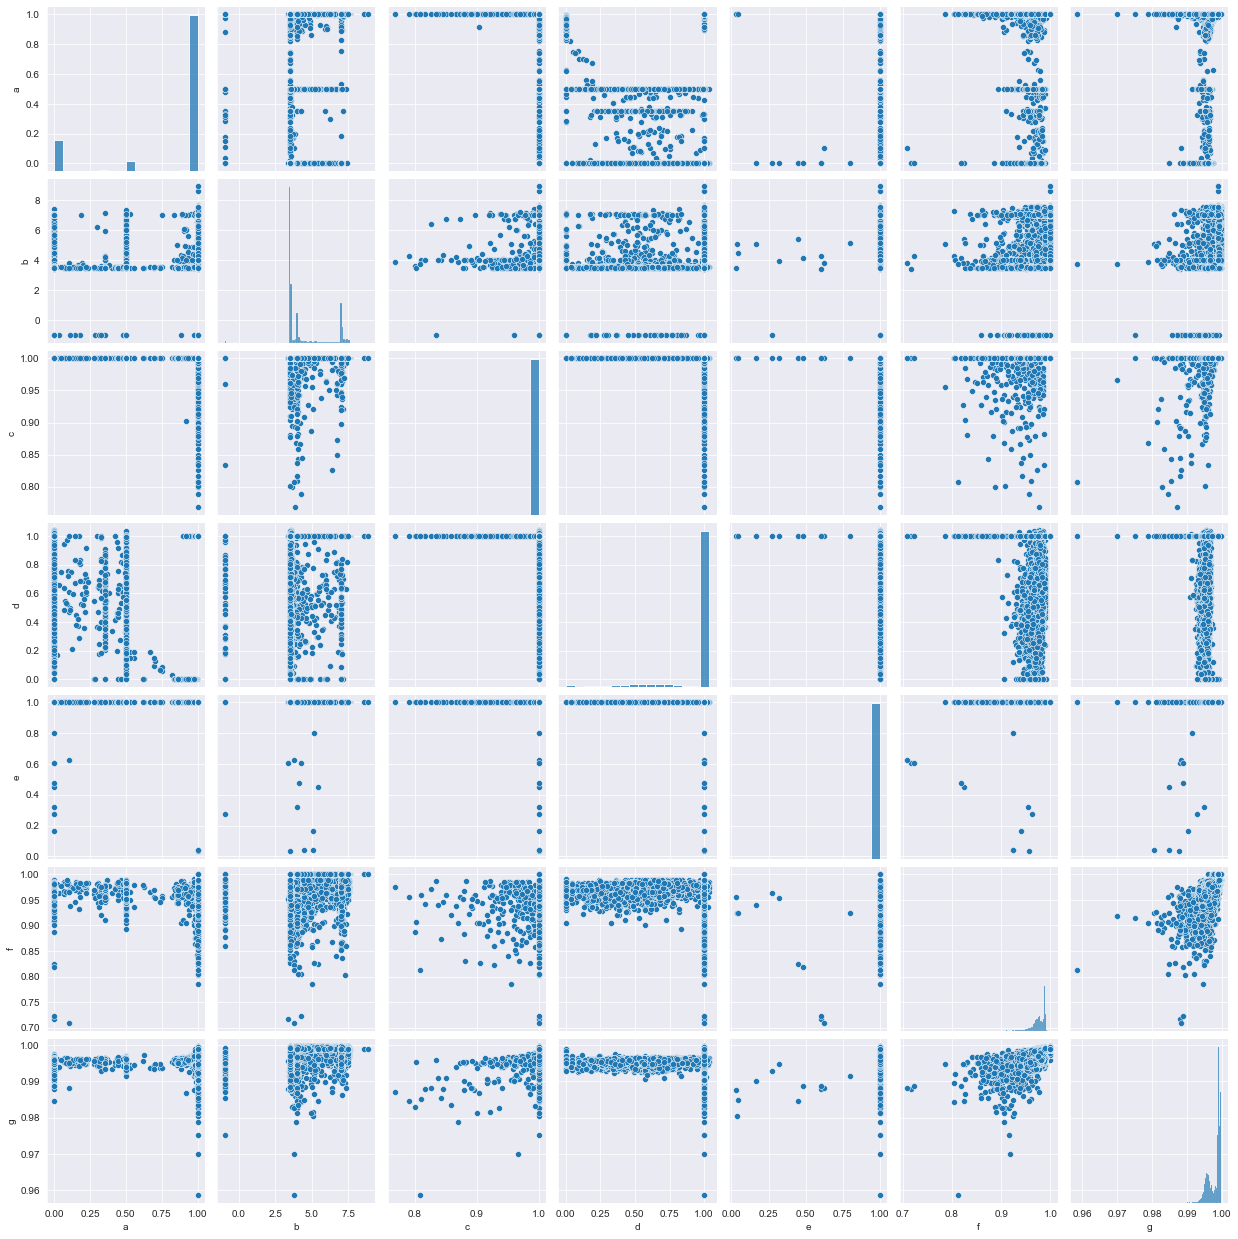

In [30]:
print(data_result.corr())
sns.pairplot(data_result)

<AxesSubplot:>

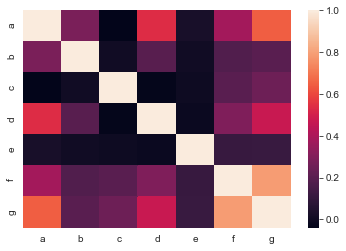

In [31]:
sns.heatmap(data_result.corr())

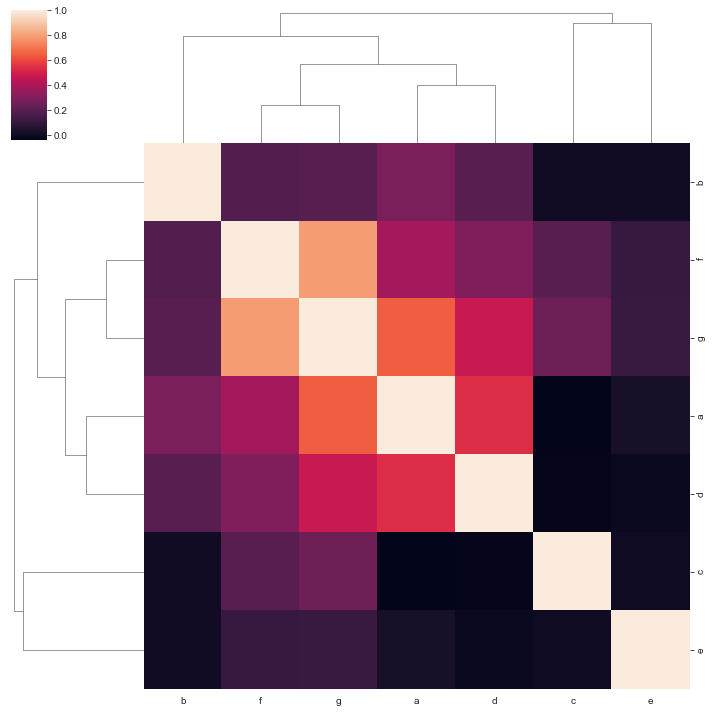

In [32]:
sns.clustermap(data_result.corr())

/Users/luoyixing/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/luoyixing/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/luoyixing/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with

ValueError: Contour levels must be increasing

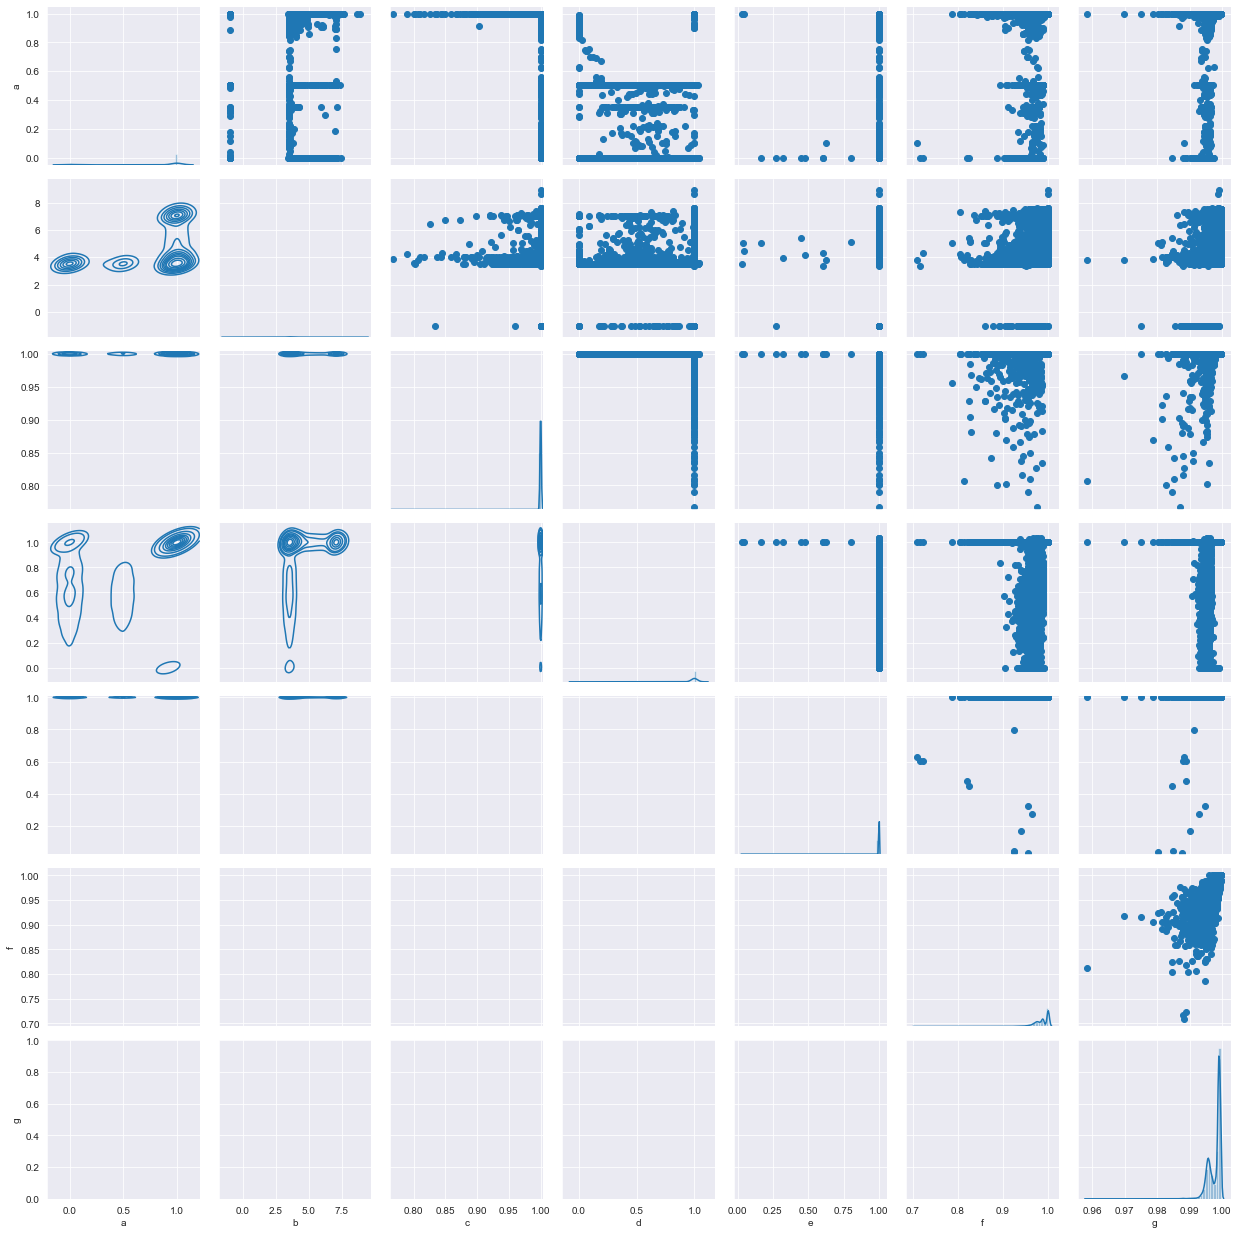

In [33]:
g = sns.PairGrid(data_result)
g.map_diag(sns.distplot)
g.map_upper(plt.scatter)
g.map_lower(sns.kdeplot)